<a href="https://colab.research.google.com/github/Manireddy69/DL/blob/main/DL_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [8]:
train_images= train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [9]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8707 - loss: 0.4474
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9665 - loss: 0.1152
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9781 - loss: 0.0741
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9846 - loss: 0.0500
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9891 - loss: 0.0377


In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0807


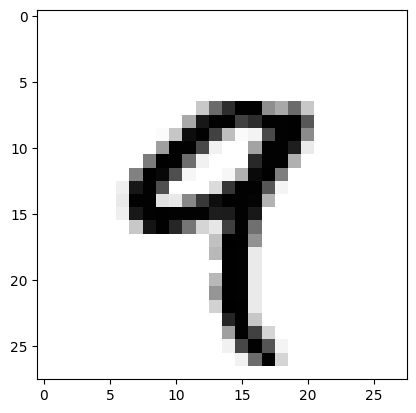

(784,)


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
digit = train_images[4]
plt.imshow(digit.reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print(digit.shape)

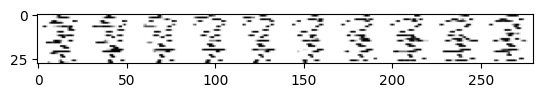

In [13]:
my_slice = train_images[0:10]
plt.imshow(my_slice.reshape(28, 10 * 28), cmap=plt.cm.binary)
plt.show()

**Classifying Movie reviews: A binary classification example**

In [14]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
train_data[0]
train_labels[0]


np.int64(1)

In [16]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
#Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [18]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [22]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [23]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data = (x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - acc: 0.6927 - loss: 0.6219 - val_acc: 0.8584 - val_loss: 0.4336
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.8871 - loss: 0.3781 - val_acc: 0.8776 - val_loss: 0.3383
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9127 - loss: 0.2747 - val_acc: 0.8703 - val_loss: 0.3162
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9312 - loss: 0.2165 - val_acc: 0.8887 - val_loss: 0.2793
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9441 - loss: 0.1739 - val_acc: 0.8856 - val_loss: 0.2811
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9520 - loss: 0.1482 - val_acc: 0.8815 - val_loss: 0.2928
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9591 - loss: 0.1310 - val_acc: 0.8866 - val_loss: 0.2880
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.9688 - loss: 0.1095 - val_acc: 0.8827 - val_loss: 0.3045
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9742

In [26]:
history_dict = history.history
history_dict.keys()


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

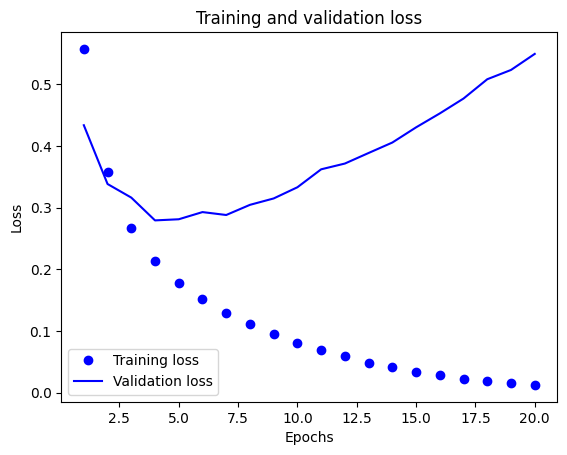

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc'] # Define acc here
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

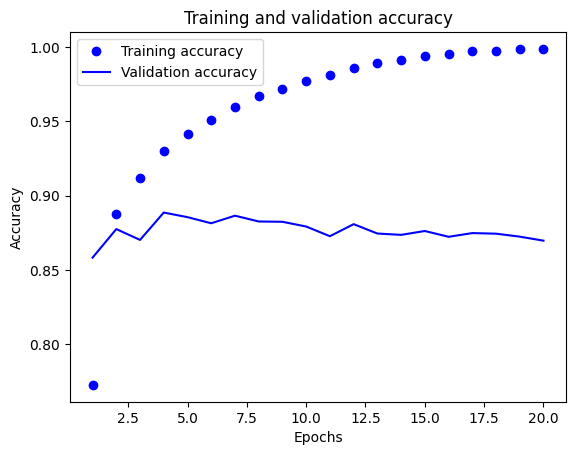

In [28]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values)+1)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
model = models.Sequential()
model.add(layers.Dense(128,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

model.fit(x_train,y_train,epochs = 4,batch_size = 512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.7130 - loss: 0.5589
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8945 - loss: 0.2692
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9221 - loss: 0.2074
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9392 - loss: 0.1625
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8589 - loss: 0.3466


In [35]:
results

[0.34978076815605164, 0.860319972038269]

In [36]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

def build_and_train_model(num_hidden_layers=2):
    """
    Builds, compiles, trains, and evaluates a neural network model
    with a specified number of hidden layers for binary classification.

    Args:
        num_hidden_layers (int): The number of hidden layers in the model.
                                 Defaults to 2.

    Returns:
        tuple: A tuple containing the evaluation results (loss and accuracy)
               on the test data.
    """
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))

    for _ in range(num_hidden_layers - 1): # Subtract 1 because the first hidden layer is already added
        model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                  loss=losses.binary_crossentropy,
                  metrics=[metrics.binary_accuracy])

    model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=0) # Set verbose to 0 to reduce output during training

    results = model.evaluate(x_test, y_test, verbose=0) # Set verbose to 0 to reduce output during evaluation
    return results

In [37]:
# Example usage with 2 hidden layers
results_2_layers = build_and_train_model(num_hidden_layers=2)
print(f"Results with 2 hidden layers: {results_2_layers}")

# Example usage with 3 hidden layers
results_3_layers = build_and_train_model(num_hidden_layers=3)
print(f"Results with 3 hidden layers: {results_3_layers}")

# Example usage with 1 hidden layer
results_1_layer = build_and_train_model(num_hidden_layers=1)
print(f"Results with 1 hidden layer: {results_1_layer}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Results with 2 hidden layers: [0.3179512619972229, 0.8756800293922424]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Results with 3 hidden layers: [0.31069624423980713, 0.8806800246238708]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Results with 1 hidden layer: [0.27954453229904175, 0.8879200220108032]
